In [1]:
import os
import numpy as np
import imageio
import glob
import matplotlib.pyplot as plt
import IPython.display
import PIL.Image
import imageio

## Input Images Path

In [2]:
# Relative paths to the notebook
images_path = glob.glob("images/*.png")
output_path = 'outputs/'

# Execute all dithering functions to all images
# NOTE: THE ENTIRE ACQUISITION TAKES ABOUT 5 MINUTES
execute_acquisitions = True

In [3]:
images = {}
for img in images_path:
     images[os.path.split(img)[1]] = imageio.imread(img)

## Dithering Functions

In [4]:
def floyd_steinberg(image, error, i, j, b=1):
    if (i >= image.shape[0] - 1 or j == 0 or j >= image.shape[1] - 2):
        return
    
    image[i, j + 1, :] += 7/16.0*error
    image[i + 1, j - 1 * b, :] += 3/16.0*error
    image[i + 1, j, :] += 5/16.0*error
    image[i + 1, j + 1 * b, :] += 1/16.0*error

    
def stevenson_arce(image, error, i, j, b=1):
    if (i >= image.shape[0] - 3 or j <= 2 or j >= image.shape[1] - 4):
        return
    
    image[i, j + 2, :] += 32/200.0*error
    
    image[i + 1, j - 3 * b, :] += 12/200.0*error
    image[i + 1, j - 1 * b, :] += 26/200.0*error
    image[i + 1, j + 1 * b, :] += 30/200.0*error
    image[i + 1, j + 3 * b, :] += 16/200.0*error
    
    image[i + 2, j - 2 * b, :] += 12/200.0*error
    image[i + 2, j, :] += 26/200.0*error
    image[i + 2, j + 2 * b, :] += 12/200.0*error
    
    image[i + 3, j - 3 * b, :] += 5/200.0*error
    image[i + 3, j - 1 * b, :] += 12/200.0*error
    image[i + 3, j + 1 * b, :] += 12/200.0*error
    image[i + 3, j + 3 * b, :] += 5/200.0*error


def burkes(image, error, i, j, b=1):
    if (i >= image.shape[0] - 1 or j <= 1 or j >= image.shape[1] - 3):
        return
    
    image[i, j + 1 * b, :] += 8/32.0*error
    image[i, j + 2 * b, :] += 4/32.0*error
    
    image[i + 1, j - 2 * b, :] += 2/32.0*error
    image[i + 1, j - 1 * b, :] += 4/32.0*error
    image[i + 1, j, :] += 8/32.0*error
    image[i + 1, j + 1 * b, :] += 4/32.0*error
    image[i + 1, j + 2 * b, :] += 2/32.0*error
    
    
def sierra(image, error, i, j, b=1):
    if (i >= image.shape[0] - 2 or j <= 1 or j >= image.shape[1] - 3):
        return
    
    image[i, j + 1, :] += 5/32.0*error
    image[i, j + 2, :] += 3/32.0*error
    
    image[i + 1, j - 2 * b, :] += 2/32.0*error
    image[i + 1, j - 1 * b, :] += 4/32.0*error
    image[i + 1, j, :] += 5/32.0*error
    image[i + 1, j + 1 * b, :] += 4/32.0*error
    image[i + 1, j + 2 * b, :] += 2/32.0*error
    
    image[i + 2, j - 1 * b, :] += 2/32.0*error
    image[i + 2, j, :] += 3/32.0*error
    image[i + 2, j + 1 * b, :] += 2/32.0*error
    

def stucki(image, error, i, j, b=1):
    if (i >= image.shape[0] - 2 or j <= 1 or j >= image.shape[1] - 3):
        return
    
    image[i, j + 1 * b, :] += 8/42.0*error
    image[i, j + 2 * b, :] += 4/42.0*error
    
    image[i + 1, j - 2 * b, :] += 2/42.0*error
    image[i + 1, j - 1 * b, :] += 4/42.0*error
    image[i + 1, j, :] += 8/42.0*error
    image[i + 1, j + 1 * b, :] += 4/42.0*error
    image[i + 1, j + 2 * b, :] += 2/42.0*error
    
    image[i + 2, j - 2 * b, :] += 1/42.0*error
    image[i + 2, j - 1 * b, :] += 2/42.0*error
    image[i + 2, j, :] += 4/42.0*error
    image[i + 2, j + 1 * b, :] += 2/42.0*error
    image[i + 2, j + 2 * b, :] += 1/42.0*error
    

def jarvis_judice_ninke(image, error, i, j, b=1):
    if (i >= image.shape[0] - 2 or j <= 1 or j >= image.shape[1] - 3):
        return
    
    image[i, j + 1 * b, :] += 7/48.0*error
    image[i, j + 2 * b, :] += 5/48.0*error
    
    image[i + 1, j - 2 * b, :] += 3/48.0*error
    image[i + 1, j - 1 * b, :] += 5/48.0*error
    image[i + 1, j, :] += 7/48.0*error
    image[i + 1, j + 1 * b, :] += 5/48.0*error
    image[i + 1, j + 2 * b, :] += 3/48.0*error
    
    image[i + 2, j - 2 * b, :] += 1/48.0*error
    image[i + 2, j - 1 * b, :] += 3/48.0*error
    image[i + 2, j, :] += 5/48.0*error
    image[i + 2, j + 1 * b, :] += 3/48.0*error
    image[i + 2, j + 2 * b, :] += 1/48.0*error

    
# Define list with all scan methods
dithering_methods = ['floyd_steinberg', 'stevenson_arce', 'burkes', 'sierra', 'stucki', 'jarvis_judice_ninke']

## Scan Function

In [5]:
def left_right_scan(image, dither_func):
    # Copy original image
    dithering_image = np.copy(image)
    
    # For every pixel in the image, limiarize it and call the dithering function for that pixel
    for i in range(dithering_image.shape[0]):
        for j in range(dithering_image.shape[1]):
            old_pixel = np.copy(dithering_image[i, j, :])
            
            # Limiarizing
            dithering_image[i, j, :] = np.where(dithering_image[i, j, :] < 128, 0, 255)
            
            error = old_pixel - dithering_image[i, j, :]
            dither_func(dithering_image, error, i, j)
        
    return dithering_image

def left_right_left_scan(image, dither_func):
    # Copy original image
    dithering_image = np.copy(image)
    
    backwards = 1
    # For every pixel in the image, limiarize it and call the dithering function for that pixel
    for i in range(dithering_image.shape[0]):
        for j in range(dithering_image.shape[1]):
            old_pixel = np.copy(dithering_image[i, j, :])
            
            # Limiarizing
            dithering_image[i, j, :] = np.where(dithering_image[i, j, :] < 128, 0, 255)
            
            error = old_pixel - dithering_image[i, j, :]
            dither_func(dithering_image, error, i, j, backwards)
        
        # After a line is run, change the direction
        backwards *= -1
        
    return dithering_image


def left_right_left_scan_4step(image, dither_func):
    # Copy original image
    dithering_image = np.copy(image)
    
    backwards = 1
    # For every pixel in the image, limiarize it and call the dithering function for that pixel
    for i in range(dithering_image.shape[0]):
        for j in range(dithering_image.shape[1]):
            old_pixel = np.copy(dithering_image[i, j, :])
                
            # Limiarizing
            dithering_image[i, j, :] = np.where(dithering_image[i, j, :] > 192 , 255, dithering_image[i, j, :])
            dithering_image[i, j, :] = np.where((dithering_image[i, j, :] > 128) & (dithering_image[i, j, :] <= 192), 170, dithering_image[i, j, :])
            dithering_image[i, j, :] = np.where((dithering_image[i, j, :] > 64) & (dithering_image[i, j, :] <= 128), 85, dithering_image[i, j, :])
            dithering_image[i, j, :] = np.where(dithering_image[i, j, :] <= 64 , 0, dithering_image[i, j, :])
            
            error = old_pixel - dithering_image[i, j, :]
            dither_func(dithering_image, error, i, j, backwards)
        
        # After a line is run, change the direction
        backwards *= -1

    return dithering_image

## Execution

In [6]:
if execute_acquisitions:
    output_images = {}

    # For evety image for evey dithering method do a left-right and a left-right-left scan
    for method in dithering_methods:
        for image_name, image in images.items():
            left_right_image = left_right_scan(image.astype('float64'), globals()[method])
            left_right_image = np.clip(left_right_image, 0, 255).astype('uint8')

            left_right_left_image = left_right_left_scan(image.astype('float64'), globals()[method])
            left_right_left_image = np.clip(left_right_left_image, 0, 255).astype('uint8')

            # Write the images
            imageio.imwrite(output_path + method + '-left_right-' + image_name, left_right_image)
            imageio.imwrite(output_path + method + '-left_right-left-' + image_name, left_right_left_image)

## Analysis

### Monalisa

In [7]:
monalisa_step1 = np.copy(images['monalisa.png']).astype('float64')
monalisa_step4 = np.copy(images['monalisa.png']).astype('float64')

ret_monalisa_step1 = left_right_left_scan(monalisa_step1, floyd_steinberg)
ret_monalisa_step1 = ret_monalisa_step1.clip(0, 255).astype('uint8')

ret_monalisa_step4 = left_right_left_scan_4step(monalisa_step4, floyd_steinberg)
ret_monalisa_step4 = ret_monalisa_step4.clip(0, 255).astype('uint8')

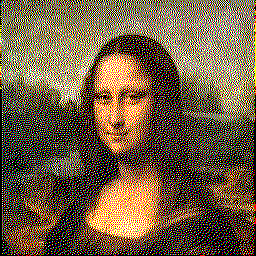

In [8]:
PIL.Image.fromarray(ret_monalisa_step1)

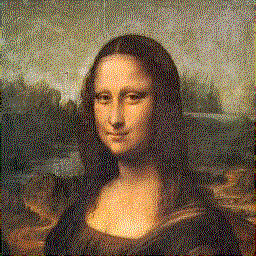

In [9]:
PIL.Image.fromarray(ret_monalisa_step4)

### Peppers

In [10]:
pepper = np.copy(images['peppers.png']).astype('float64')

ret_pepper = left_right_left_scan(pepper, floyd_steinberg)
ret_pepper = ret_pepper.clip(0, 255).astype('uint8')

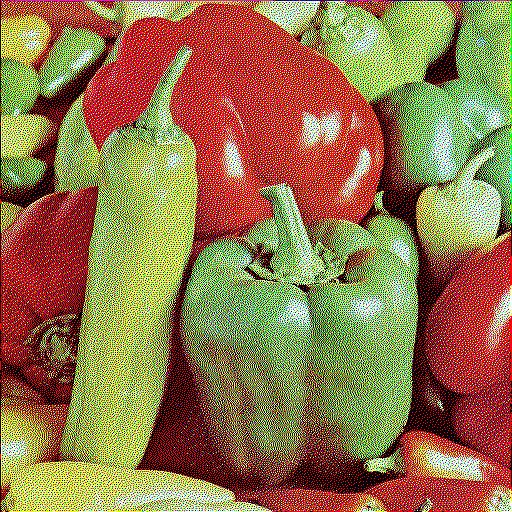

In [11]:
PIL.Image.fromarray(ret_pepper)

#### Histograms

In [12]:
# Get histogram for original and dithered image
original_r_h = np.histogram(pepper[:, :, 0], 255)
original_g_h = np.histogram(pepper[:, :, 1], 255)
original_b_h = np.histogram(pepper[:, :, 2], 255)

dith_r_h = np.histogram(ret_pepper[:, :, 0], 2)
dith_g_h = np.histogram(ret_pepper[:, :, 1], 2)
dith_b_h = np.histogram(ret_pepper[:, :, 2], 2)

In [13]:
# Define colors for prettier histograms
red_colors = np.linspace((0.0, 0.0, 0.0), (1.0, 0.0, 0.0), 256)
green_colors = np.linspace((0.0, 0.0, 0.0), (0.0, 1.0, 0.0), 256)
blue_colors = np.linspace((0.0, 0.0, 0.0), (0.0, 0.0, 1.0), 256)

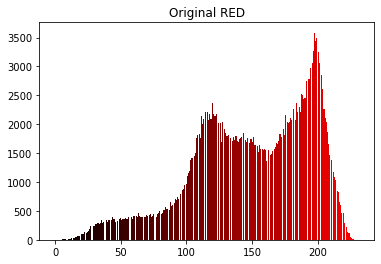

In [14]:
fig, ax = plt.subplots()
plt.bar(original_r_h[1], np.append(original_r_h[0], 0), color=red_colors)
plt.title("Original RED")
plt.show()

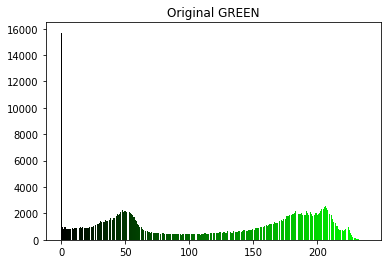

In [15]:
fig, ax = plt.subplots()
plt.bar(original_g_h[1], np.append(original_g_h[0], 0), color=green_colors)
plt.title("Original GREEN")
plt.show()

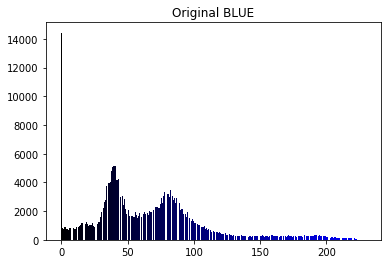

In [16]:
fig, ax = plt.subplots()
plt.bar(original_b_h[1], np.append(original_b_h[0], 0), color=blue_colors)
plt.title("Original BLUE")
plt.show()

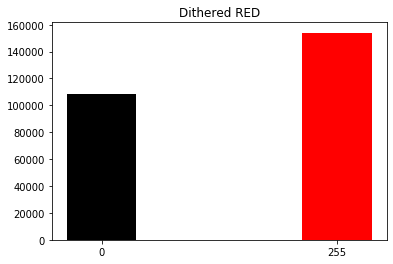

In [17]:
fig, ax = plt.subplots()
plt.bar((dith_r_h[1][0], dith_r_h[1][-1]), dith_r_h[0], color=(red_colors[0], red_colors[-1]), width=75.0)
plt.xticks((dith_r_h[1][0], dith_r_h[1][-1]), ('0', '255'))
plt.title("Dithered RED")
plt.show()

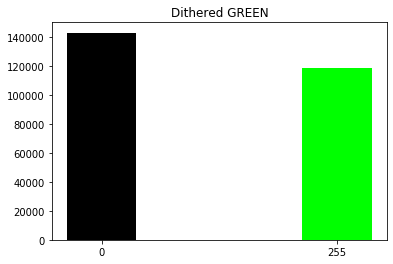

In [18]:
fig, ax = plt.subplots()
plt.bar((dith_g_h[1][0], dith_g_h[1][-1]), dith_g_h[0], color=(green_colors[0], green_colors[-1]), width=75.0)
plt.xticks((dith_g_h[1][0], dith_g_h[1][-1]), ('0', '255'))
plt.title("Dithered GREEN")
plt.show()

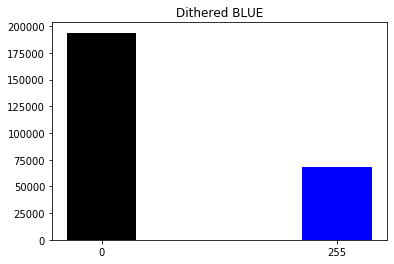

In [19]:
fig, ax = plt.subplots()
plt.bar((dith_b_h[1][0], dith_b_h[1][-1]), dith_b_h[0], color=(blue_colors[0], blue_colors[-1]), width=75.0)
plt.xticks((dith_b_h[1][0], dith_b_h[1][-1]), ('0', '255'))
plt.title("Dithered BLUE")
plt.show()